## 자유주제

### 영화 리뷰 데이터를 이용하여 나만의 새로운 결과물 만들어보기

## 해당 결과물을 만든 이유

### 개인적인 이유
지정 과제에서 만든 워드클라우드가 너무 투박하다고 생각한다.  
인생 영화로 선택한 `하울의 움직이는 성`의 명장면을 활용하여 워드클라우드를 만들면   
텍스트 마이닝과 더불어 시각적으로도 의미있는 결과물을 만들 수 있기 때문에  
**영화의 한 장면을 영화 리뷰 워드클라우드로 표현**하고자 한다.


### 기술적인 이유
리뷰 데이터를 이용하여 워드 클라우드를 도출하는 지정과제를 수행할 때,  
청록색 계열의 색이 랜덤하게 나왔다.  
파라미터를 추가해 다른 테마의 색으로도 변경 가능하지만,  
여전히 색상 선택에 제한이 있다.  
따라서 지정 과제의 결과물에서 더 나아가, **워드클라우드를 좀더 예쁘게 출력**하고자 한다.

</br>

### 개발환경

![OS](https://img.shields.io/badge/OS-macOS%20Monterey-lightgrey)
![Language](https://img.shields.io/badge/Language-Python-%234B8BBE)
![Platform](https://img.shields.io/badge/Platform-Jupyter-%23EB7425)
![Library](https://img.shields.io/badge/Library-Matplotlib-%23306998)

## `selenium` 으로 영화 `하울의 움직이는 성` 링크 가져오기

In [1]:
from selenium import webdriver
import time
from bs4 import BeautifulSoup
from nltk.tokenize import word_tokenize
import nltk

driver = webdriver.Chrome(r"C:\Users\SH501\Downloads\chromedriver_win32\chromedriver.exe")

url = "https://movie.daum.net/moviedb/grade?movieId=39208"
driver.get(url)

/var/folders/55/36xc75rd0s3fd8vsc5bzwfh80000gn/T/ipykernel_34422/3246421736.py:7: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(r"C:\Users\SH501\Downloads\chromedriver_win32\chromedriver.exe")


## `평점 더보기` 를 클릭하여 모든 리뷰 보기

In [2]:
while(True):
    try:
        time.sleep(2)
        driver.find_element("xpath", '/html/body/div[2]/main/article/div/div[2]/div[2]/div/div/div[2]/div/div/div/div[3]/div[1]/button[1]').click()
    except:
        break

## 현재 페이지 소스를 저장하고
## 파싱을 위해 `BeautifulSoup` 으로 가져오기

In [3]:
html = driver.page_source
soup = BeautifulSoup(html, 'html.parser')

## `list_comment` 내 감상평과 평점 가져오기

In [4]:
train_txt = []

result = soup.find("ul", {"class": "list_comment"})
li_result = result.find_all("li")

for li_res in result:
    desc_txt = li_res.find("p")
    if desc_txt == None: # 감상평 없이 평점만 있다면
        continue         # 리스트에 저장하지 않고 넘긴다.
    else:
        desc_txt = li_res.find("p").text
        train_txt.append(desc_txt)
        
#train_txt

## 명사 추출

In [5]:
from konlpy.tag import Okt

okt = Okt()

train_txt_noun = okt.nouns(str(train_txt))

## `Stopword` 제거하기

In [6]:
stopword_list = []

for word in train_txt_noun:
    if len(word) == 1: # 긍정/부정 단어도 고려해야 하는 지정 과제와는 달리, 워드클라우드의 심미성을 고려하여 한 글자짜리 단어는 배제하였다.
        stopword_list.append(word)

for stopword in stopword_list:
    if stopword in train_txt_noun:
        train_txt_noun.pop(train_txt_noun.index(stopword))
train_txt_noun

['하울',
 '영화',
 '가장',
 '기억',
 '영화',
 '마디',
 '하루',
 '몇번',
 '만큼',
 '시네마',
 '천국',
 '리오',
 '모리코네',
 '음악',
 '완성',
 '하울',
 '성은',
 '조의',
 '음악',
 '완성',
 '지브리',
 '영화',
 '제일',
 '안개',
 '서서히',
 '모습',
 '하울',
 '성은',
 '마치',
 '안데스',
 '산맥',
 '마츄픽츄',
 '연상',
 '동경',
 '추억',
 '남자',
 '여자',
 '내용',
 '역시',
 '지브리',
 '미야자키',
 '영화음악',
 '계속',
 '머리',
 '하울',
 '규어',
 '판다',
 '사고',
 '영화',
 '한편',
 '힐링',
 '노래',
 '존경',
 '미야자키',
 '감독',
 '상상',
 '마녀',
 '저주',
 '할머니',
 '순간',
 '시작',
 '저주',
 '절세',
 '명작',
 '음악',
 '애니',
 '영화',
 '망라',
 '역대',
 '지브리',
 '바로',
 '하울',
 '인생',
 '작품',
 '하울',
 '결혼',
 '스토리',
 '정신',
 '지루함',
 '이상',
 '감동',
 '마음',
 '하울',
 '마음',
 '린다',
 '사랑',
 '피앤',
 '우르',
 '영화',
 '플롯',
 '구조',
 '분석',
 '하울',
 '만남',
 '우연이',
 '두번째',
 '보고',
 '영화',
 '얼마나',
 '계획',
 '구조',
 '미장셴',
 '인물',
 '대화',
 '대사',
 '의도',
 '사랑',
 '평화',
 '가치',
 '생각',
 '감동',
 '여운',
 '보기',
 '이군',
 '배경음악',
 '마음',
 '음악',
 '하울',
 '다시',
 '정제',
 '정제',
 '지브리',
 '감성',
 '마음',
 '느낌',
 '아주',
 '아이',
 '동심',
 '편의',
 '정말',
 '영화',
 '영화',
 '영화',
 '보고',
 '며칠',
 '영화',
 '젊음',
 '늙음',
 '전쟁',
 

## 단어가 언급된 횟수 세기

In [7]:
from collections import Counter

count_noun = Counter(train_txt_noun)
count_noun = dict(count_noun) # generate_from_frequencies 는 딕셔너리 타입을 받는다.
type(dict(count_noun)) 

dict

## 워드클라우드로 만들 명장면 선정 및 배경 지우기

### before

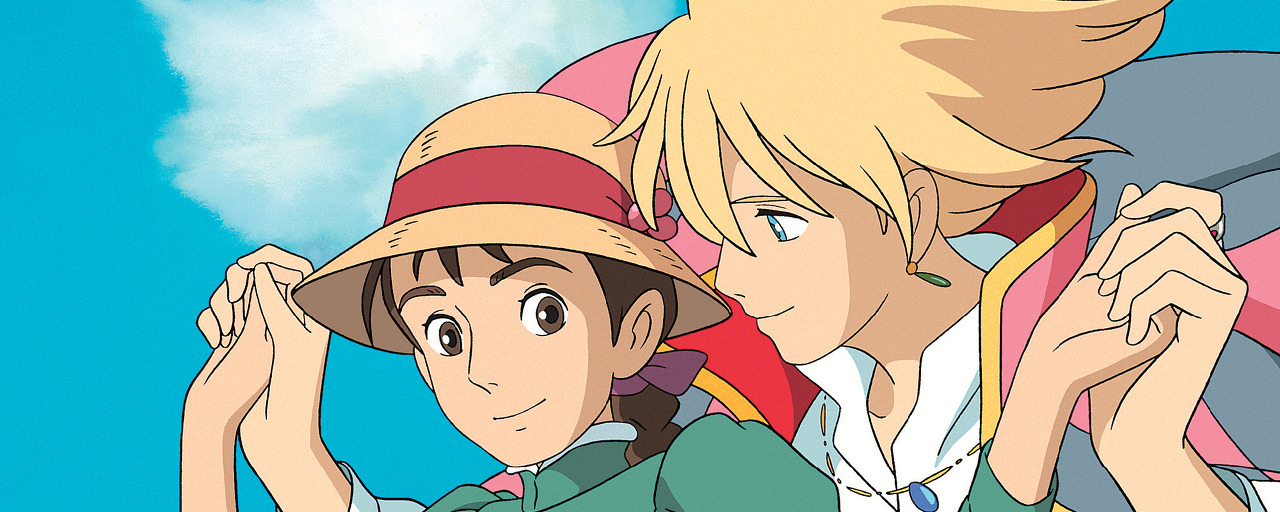

### after (포토샵을 활용하여 배경 제거)
before 이미지로 만든 워드클라우드가 미관상 더 보기 좋아 기각.
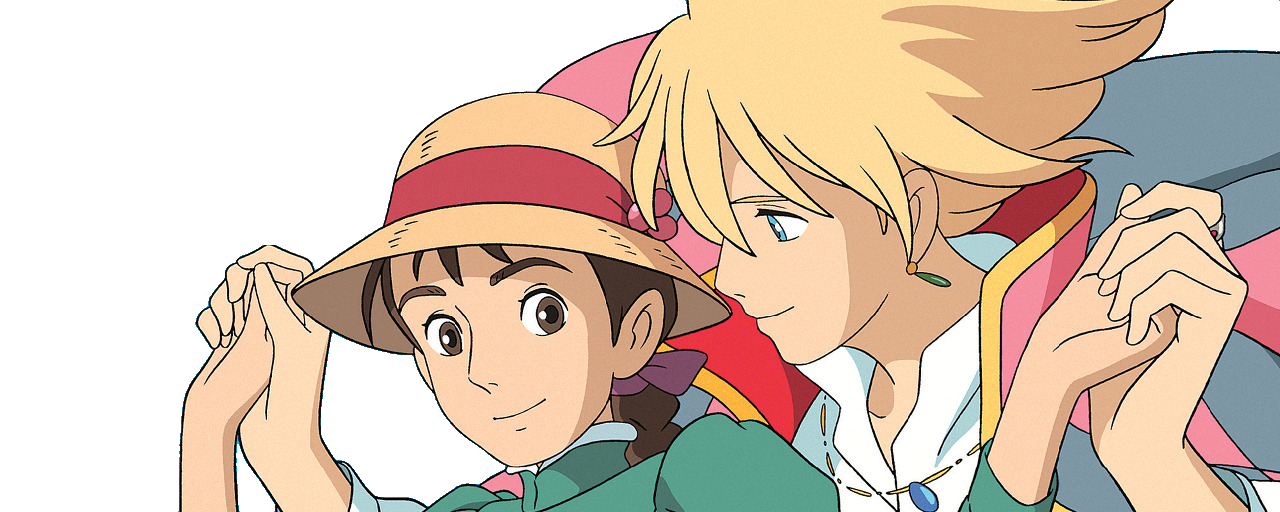

## 워드클라우드 만들기

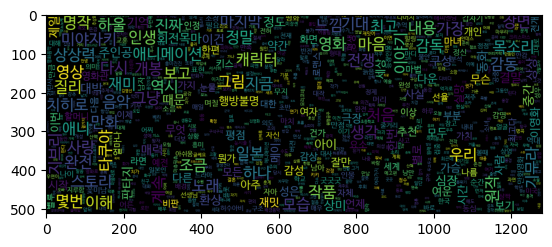

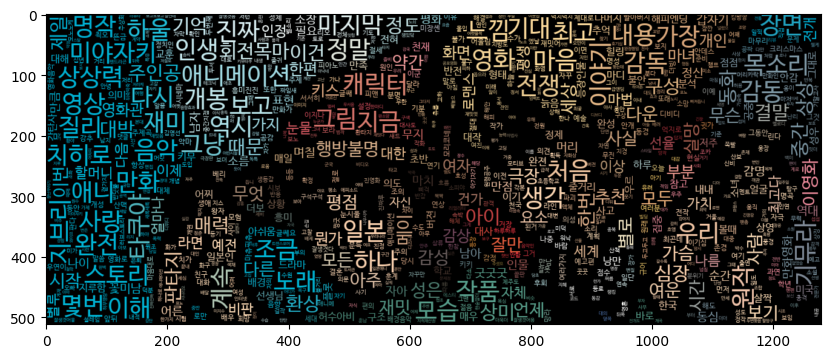

In [8]:
import os
from PIL import Image

import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_gradient_magnitude

from wordcloud import WordCloud, ImageColorGenerator

# 데이터 디렉토리 가져오기 - 현재 작업 경로를 가져오기 위해 os.getcwd() 사용 
d = os.path.dirname(__file__) if "__file__" in locals() else os.getcwd()

# 텍스트 가져오기
text = count_noun

# 이미지 불러오기
movie_cloud_color = np.array(Image.open(os.path.join(d, "download.jpeg")))
# 숫자가 작을수록 더욱 섬세한 모양의 워드클라우드를 만들 수 있다.
movie_cloud_color = movie_cloud_color[::1, ::1]

# 마스크 만들기
movie_cloud_mask = movie_cloud_color.copy()
movie_cloud_mask[movie_cloud_mask.sum(axis=2) == 0] = 255

# 산술평균을 이용해 색 사이의 경계를 강화하여 색이 덜 지워지도록 한다.
# .125 값을 조절한다. 숫자가 클수록 테두리, 즉 색의 경계선이 얇아진다.
edges = np.mean([gaussian_gradient_magnitude(movie_cloud_color[:, :, i] / 255., 2) for i in range(3)], axis=0)
movie_cloud_mask[edges > .08] = 255

# 워드클라우드 만들기
# relative_scaling=0 은 단어 등장 빈도에 따른 크기 차이를 조절하는 비율값이다.
# 각 단어별 절대적인 빈도수가 적은 편이므로 이 파라미터가 없으면 글씨가 작게 출력되어 어떤 이미지인지 알아볼 수 없게 된다.
wc = WordCloud(max_words=2000, font_path='/Library/Fonts/NanumBarunGothic.ttf', mask=movie_cloud_mask, max_font_size=40, random_state=42, relative_scaling=0)

# 빈도 수 워드클라우드 생성
wc.generate_from_frequencies(text)
plt.imshow(wc) # 워드클라우드 프로토타입 - 색을 입힐 예정

# 이미지로부터 색상 받아오기
image_colors = ImageColorGenerator(movie_cloud_color)
wc.recolor(color_func=image_colors)
plt.figure(figsize=(10, 10))
plt.imshow(wc, interpolation="bilinear")
wc.to_file("movie_cloud.png") # png 파일로 저장한다.

#plt.figure(figsize=(10, 10))
#plt.title("Original Image")
#plt.imshow(movie_cloud_color) #이미지 원본을 보여준다.

#plt.figure(figsize=(10, 10))
#plt.title("Edge map")
#plt.imshow(edges) #이미지 테두리를 보여준다.
plt.show()

with open("movie_cloud.svg", "w") as text_file:
    text_file.write(wc.to_svg()) # svg 파일로 저장한다.

In [9]:
driver.close()

## 느낀 점 및 자기평가
청록색 계열의 투박한 기본테마보다 **`훨씬 예쁘다`**. 눈을 가늘게 뜨고 멀리서 보면 더 예쁘다. 만족스러운 결과가 나왔다.  
캐릭터만 색칠하기에도 벅찰 정도로 감상평의 단어 수가 적을까봐 걱정했는데,  
배경까지 칠해도 될 정도로 데이터를 충분히 뽑아낼 수 있었다.  
이 프로젝트를 응용하여, **원하는 사진에서 색을 뽑아내어**  
커플 간의 **채팅 내용을 바탕**으로 워드클라우드 이미지를 만들어주는 서비스를 배포해보고 싶다. 재미있는 프로젝트가 될 것이다!